### https://github.com/MicrosoftDocs/ml-basics/blob/master/05a%20-%20Deep%20Neural%20Networks%20(TensorFlow).ipynb

In [1]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
import os
import cv2 as cv2

IMG_SIZE = 28
Full_DS = []

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        images = []
        for number in range(0,10):
            image_path = os.path.join(images_filepath, str(number)) #making path to folder
            for img in os.listdir(image_path):
                try:
                    #print(img.name)
                    raw_img = cv2.imread(os.path.join(image_path,img), cv2.IMREAD_GRAYSCALE) #get full image path & make it GRAY
                    ##raw_img = cv2.imread(os.path.join(image_path,img), cv2.IMREAD_COLOR) #get full image path & make it COLOR
                    ##resized_img = cv2.resize(raw_img, (IMG_SIZE, IMG_SIZE))
                    #Full_DS.append([raw_img, label_img])
                    images.append(raw_img)
                    labels.append(number)
                except Exception as e:
                    print("Corupted Images: ", os.path.join(images_filepath, str(number), img))
            
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

In [2]:
# def read_images_labels1(images_filepath, labels_filepath=""):    
#     print("images_filepath:", images_filepath)    
#     for number in range(0,1):
#         image_path = os.path.join(images_filepath, str(number)) #making path to folder
#         print(image_path)
#         label_img = number
#         for img in os.listdir(image_path):
#             try:
#                 print(img.name)
#                 #raw_img = cv2.imread(join(path,img), cv2.IMREAD_GRAYSCALE) #get full image path & make it GRAY
#                 ##raw_img = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #get full image path & make it COLOR
#                 ##resized_img = cv2.resize(raw_img, (IMG_SIZE, IMG_SIZE))
#                 #Full_DS.append([raw_img, label_img])
#             except Exception as e:
#                 print("Corupted Images: ", os.path.join(images_filepath, "/", str(number),"/", img))
        
#     #return Full_DS[0], Full_DS[1]

# input_path = 'data\\mnist\\'
# training_images_filepath = os.path.join(input_path, 'train')
# training_labels_filepath = ""
# test_images_filepath = os.path.join(input_path, 'test')
# test_labels_filepath = ""

# print("training_images_filepath:", training_images_filepath)
# read_images_labels(training_images_filepath)


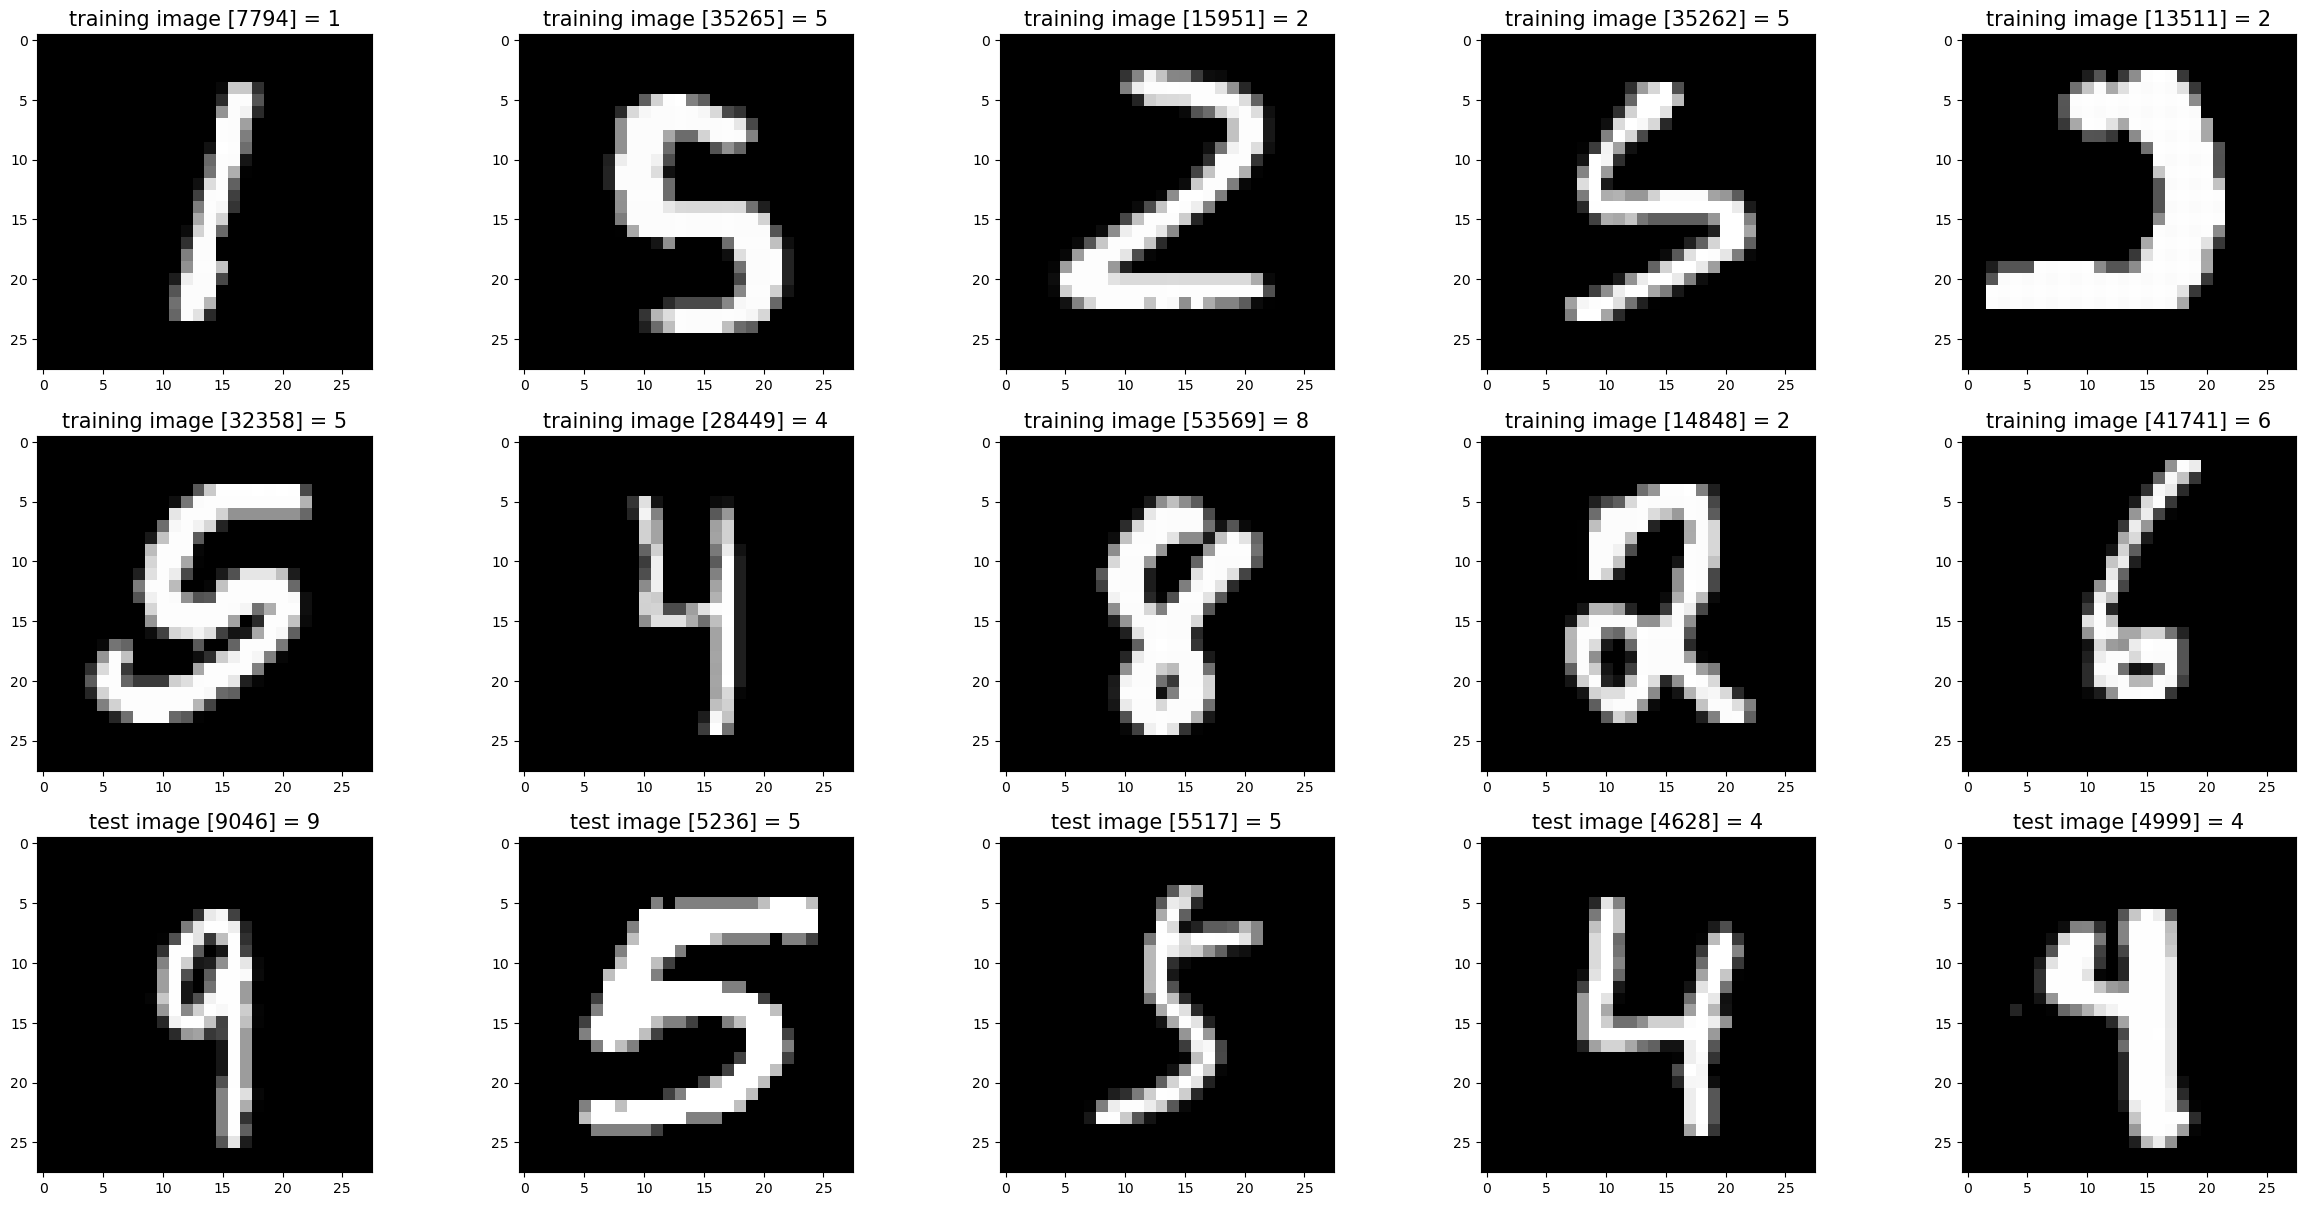

In [3]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = 'data\\mnist\\'
training_images_filepath = os.path.join(input_path, 'train')
training_labels_filepath = ""
test_images_filepath = os.path.join(input_path, 'test')
test_labels_filepath = ""

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [4]:
print("Train Images:{0}".format(len(x_train)))
print("Train Labels:{0}".format(len(y_train)))

print("Test Images:{0}".format(len(x_test)))
print("Test Labels:{0}".format(len(y_test)))

Train Images:60000
Train Labels:60000
Test Images:10000
Test Labels:10000


In [5]:
y_train[0]

0

In [6]:
# Flatten the array
x_train_flat = np.array(x_train).reshape(len(x_train), 28, 28, 1 ) 
x_train_flat = x_train_flat.astype('float32') / 255

x_test_flat = np.array(x_test).reshape(len(x_test), 28, 28, 1 ) 
x_test_flat = x_test_flat.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [7]:
#x_train_flat.shape
#y_train.shape

#x_test_flat.shape
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# Train

In [17]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
model = Sequential()

#=========================================== 1 ===================================================
model.add(Conv2D(64, (6, 6), input_shape=(28, 28, 1), activation='relu'))
# #model.add(Dropout(0.2))
# #model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (6, 6), activation='relu'))
# #model.add(Dropout(0.2))
# #model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (6, 6), activation='relu'))
# #model.add(Dropout(0.2))
# #model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#=========================================== 2 ===================================================
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))

# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 23, 23, 64)        2368      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 64)        147520    
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        147520    
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                108170    
                                                                 
Total params: 405578 (1.55 MB)
Trainable params: 405578 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Evaluate Model

In [18]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

num_epochs = 20
history = model.fit(x_train_flat, y_train_hot, epochs=num_epochs, batch_size=64, validation_data=(x_test_flat, y_test_hot),
          callbacks=early_stopping)

Epoch 1/20
938/938 [==============================] - 317s 335ms/step - loss: 0.1159 - accuracy: 0.9645 - val_loss: 0.0601 - val_accuracy: 0.9799
Epoch 2/20
938/938 [==============================] - 325s 347ms/step - loss: 0.0412 - accuracy: 0.9875 - val_loss: 0.0342 - val_accuracy: 0.9893
Epoch 3/20
938/938 [==============================] - 302s 322ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0318 - val_accuracy: 0.9907
Epoch 4/20
938/938 [==============================] - 279s 298ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0279 - val_accuracy: 0.9907
Epoch 5/20
938/938 [==============================] - 289s 308ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0257 - val_accuracy: 0.9922
Epoch 6/20
938/938 [==============================] - 316s 337ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0404 - val_accuracy: 0.9890
Epoch 7/20
938/938 [==============================] - 302s 322ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0311 -

# Review training and validation loss

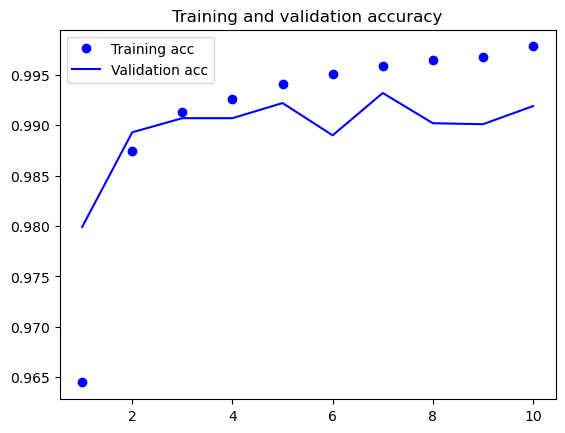

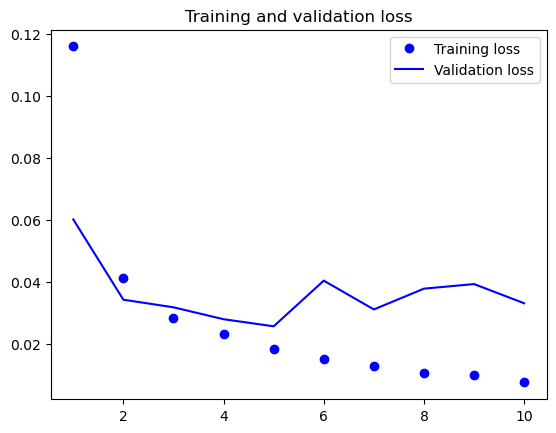

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate model performance

In [ ]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test_flat)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange()
plt.xticks(tick_marks, true_labels, rotation=85)
plt.yticks(tick_marks, true_labels)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

# Save the trained model

In [ ]:
# Save the trained model
modelFileName = 'models/mnist-cnn.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

# Use the trained model

# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])